In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the ZIP file in your Drive
zip_path = "/content/drive/MyDrive/Rice_Leaf_AUG.zip"  # update path if needed

# Extract it to current working directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")

# Check folder content
print("Extracted folders:")
print(os.listdir("Rice_Leaf_AUG"))

Mounted at /content/drive
Extracted folders:
['Healthy Rice Leaf', 'Brown Spot', 'Sheath Blight', 'Neck_Blast', 'Rice Hispa', 'Narrow Brown Leaf Spot', 'Leaf scald', 'Leaf Blast', 'Bacterial Leaf Blight']


Total images loaded: 11790
Image shape: (128, 128, 3)


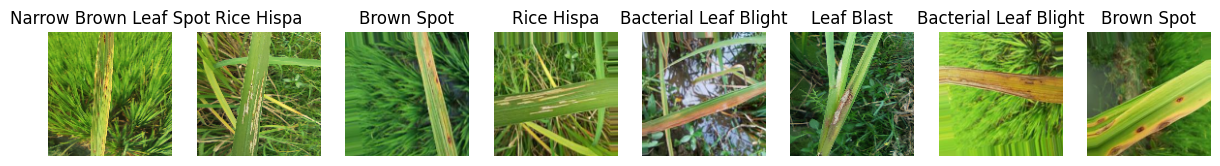

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Dataset path
dataset_path = '/content/Rice_Leaf_AUG'

# Resize images to 128x128
img_size = (128, 128)

# Load and preprocess images
def load_images(path, img_size=(128,128)):
    images = []
    labels = []
    class_map = {}
    class_index = 0

    for folder in sorted(os.listdir(path)):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            class_map[class_index] = folder
            for img_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_name)
                try:
                    img = cv2.imread(img_path)
                    img = cv2.resize(img, img_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    images.append(img)
                    labels.append(class_index)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
            class_index += 1

    return np.array(images), np.array(labels), class_map

# Load dataset
images, labels, class_map = load_images(dataset_path, img_size)

print("Total images loaded:", len(images))
print("Image shape:", images[0].shape if len(images) > 0 else "No image")

# Show random samples
def show_samples(images, labels, class_map, n=8):
    plt.figure(figsize=(15, 4))
    for i in range(n):
        idx = np.random.randint(0, len(images))
        plt.subplot(1, n, i+1)
        plt.imshow(images[idx])
        plt.title(class_map[labels[idx]])
        plt.axis('off')
    plt.show()

show_samples(images, labels, class_map)


In [ ]:
from sklearn.model_selection import train_test_split

# Normalize images
images = images / 255.0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 9432
Testing samples: 2358


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot
num_classes = len(np.unique(labels))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test, y_test_cat))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,481 (28.20 MB)

 Trainable params: 7,393,481 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from google.colab import drive
import zipfile
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Unzip the dataset
zip_path = '/content/drive/MyDrive/Rice_Leaf_AUG.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content")

# Define paths
dataset_path = '/content/Rice_Leaf_AUG'
img_size = (128, 128)

# Preprocessing function
def preprocess_images(path, img_size=(128,128)):
    images = []
    labels = []
    class_map = {}
    class_index = 0

    for folder in sorted(os.listdir(path)):
        folder_path = os.path.join(path, folder)
        if os.path.isdir(folder_path):
            class_map[class_index] = folder
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                try:
                    img = cv2.imread(img_path)
                    img = cv2.resize(img, img_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = img / 255.0  # normalize
                    images.append(img)
                    labels.append(class_index)
                except Exception as e:
                    print(f"Error loading {img_path}: {e}")
            class_index += 1

    return np.array(images), np.array(labels), class_map

# Run preprocessing
images, labels, class_map = preprocess_images(dataset_path, img_size)

# Check
print("✅ Preprocessing done!")
print("Total images:", len(images))
print("Image shape:", images[0].shape if len(images) > 0 else "None")
print("Label classes:", class_map)

# (Optional) Save for future use
np.save('/content/images.npy', images)
np.save('/content/labels.npy', labels)
print("📁 Saved preprocessed data as .npy files")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Preprocessing done!
Total images: 11790
Image shape: (128, 128, 3)
Label classes: {0: 'Bacterial Leaf Blight', 1: 'Brown Spot', 2: 'Healthy Rice Leaf', 3: 'Leaf Blast', 4: 'Leaf scald', 5: 'Narrow Brown Leaf Spot', 6: 'Neck_Blast', 7: 'Rice Hispa', 8: 'Sheath Blight'}
📁 Saved preprocessed data as .npy files


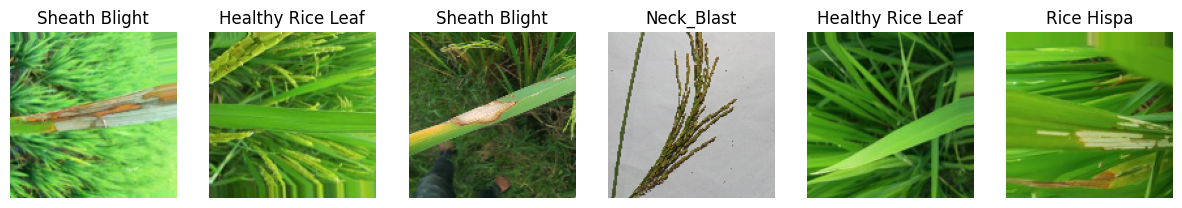

In [ ]:
def show_samples(images, labels, class_map, n=6):
    plt.figure(figsize=(15, 4))
    for i in range(n):
        idx = np.random.randint(0, len(images))
        plt.subplot(1, n, i+1)
        plt.imshow(images[idx])
        plt.title(class_map[labels[idx]])
        plt.axis('off')
    plt.show()

show_samples(images, labels, class_map)
